# Heat Equation 2D

We try to approximate the solution of
\begin{align}
\partial_t u - \nu \Delta u &= f \quad\text{in } \Omega=(a,b)^2 \times (0,T),
\\
\nabla u \cdot n &= 0\quad\text{on } \partial\Omega,
\end{align}
where $(a,b)\subset\mathbb{R}$ is an interval, $T>0$ is a given final time and $f\in C([a,b]^2 \times (0,T))$.

Let us consider the mesh $(x_i,y_j)=(a+h i, b+h j)$, for  $i,j=0,...,n+1$, with $h=(b-a)/(n+2)$, and the time partition $t_m = km$, $m=0,...,M$ whith $k=T/M$.

We define the problem: given $u_{i,j}^{m-1}$, $m\ge 1$, find $u_{i,j}^m \simeq u(x_i, y_j, t_m)$ such that

$$
\frac 1 k u_{i,j}^m 
- \nu \frac{ u_{i+1,j}^m - 2u_{i,j}^m + u_{i-1,j}^m}{h^2}
- \nu \frac{ u_{i,j+1}^m - 2u_{i,j}^m + u_{i,j-1}^m}{h^2}
=
f^m_{ij} + \frac 1 k u_{i,j}^{m-1},
$$
or
$$
\Big(\frac 1 k + \frac{4\nu}{h^2}\Big) u_{i,j}^m 
- \frac{\nu}{h^2} u_{i+1,j}^m
- \frac{\nu}{h^2} u_{i-1,j}^m
- \frac{\nu}{h^2} u_{i,j+1}^m
- \frac{\nu}{h^2} u_{i,j-1}^m
=
f^m_{ij} + \frac 1 k u_{i,j}^{m-1},
$$
or
$$
\big(h^2+ 4 k \nu \big) u_{i,j}^m 
- k \nu \, u_{i+1,j}^m
- k \nu \, u_{i-1,j}^m
- k \nu \, u_{i,j+1}^m
- k \nu \, u_{i,j-1}^m
=
k h^2 f^m_{ij} + h^2 u_{i,j}^{m-1},
$$

It can be written as the system
$AU=F$ with 
$$U=( u^m_{11},u^m_{12},...,u^m_{1,n},\ u^m_{21},u^m_{22},...,u^m_{2,n},\ ...\ u^m_{n,1},u^m_{n,2},...,u^m_{n,n})$$
i.e. $U_{i+n j}=u^m_{i,j}$ $(1\le i,j \le n)$. Also $F_{i+n j}=k h^2 f^m_{ij} + h^2 u_{i,j}^{m-1}$ and finally
$$
A=
\begin{pmatrix}
   a & -b &  0 &  0 & \dots & -c & 0 & \dots & 0 \\
  -b &  a & -b &  0 & \dots & 0 & -c & \dots & 0\\
   0 & -b &  a & -b & \dots & 0 & 0 & \ddots & 0 \\
   \vdots &    & \ddots & \ddots & \ddots & \\
   -c & 0 & \dots & -b & a  & -b \\
   0 & -c &  0 & \dots & -b & a  & -b \\
     & & &&    & \ddots & \ddots & \ddots & \\
   0 & \dots & &  & & & 0 & a & -b \\ 
   0 & \dots & &  & & &  & -b & a \\
 \end{pmatrix},
$$
siendo:
\begin{align*}
  a&= h^2 + 4k\nu, \\
  b&=c=k\nu.
\end{align*}
El vector diagonal $(c,c,\dots,c)$ está separado exactamente $n$
posiciones desde la diagonal de la matriz.


#### Boundary conditions

Let $\Gamma_l$, $\Gamma_r$, $\Gamma_b$, $\Gamma_t$ be the left, right, bottom and top boundaries of the square $(a,b)^2$. Homogeneous Neumann b.c. can be approximated as follows:

* On $\Gamma_l$: $\nabla u(a,y_j,t_m) \times n = \nabla u(a,y_j,t_m) \times (-1,0) = -\partial_x   u(a,y_j,t_m) \simeq -\frac{u^m_{1,j}-u^m_{0,j}}{h}=0$,
* On $\Gamma_r$: $\nabla u(b,y_j,t_m) \times n = \nabla u(b,y_j,t_m) \times (1,0) = \partial_x   u(b,y_j,t_m) \simeq \frac{u^m_{n+1,j}-u^m_{n,j}}{h}=0$,
* On $\Gamma_b$: $\nabla u(x_j,a,t_m) \times n = \nabla u(x_j,a,t_m) \times (-1,0) = -\partial_y   u(x_j,a,t_m) \simeq -\frac{u^m_{i,1}-u^m_{i,0}}{h}=0$,
* On $\Gamma_t$: $\nabla u(x_j,b,t_m) \times n = \nabla u(x_j,b,t_m) \times (1,0) = \partial_y   u(x_j,b,t_m) \simeq \frac{u^m_{i,n+1}-u^m_{i,n}}{h}=0$.

Then, boundary conditions can be approximated by defining, for each $m\ge 1$, the values $u^m_{0,j}=u^m_{1,j}$, $u^m_{n+1,j}=u^m_{n,j}$, $u^m_{i,0}=u^m_{i,1}$, $u^m_{i,n+1}=u^m_{i,n}$, $i,j=0,\dots,n+1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import diag, ones, linspace, array, reshape
from numpy.linalg import solve

In [92]:
def heat_equaton_Neumann_2d(f, u_init, nx=9, nt=2, a=0, b=1, T=1, nu=1, verbosity=0):
    """
    Heat equatin with Homogeneous Neumann Boundary Conditions.
    * f: RHS
    * u_inti: Intial function, u_init(x,y)
    * nu: Viscosity coefficient
    * a, b: interval (domain = (a,b)^2)
    * T: Max. time (time interval (0,T))
    * nx: space discretization, a=x_0,x_1,...,x_{n+1}=b$
    * nt: time discretization, 0=t_0,t_1,...,t_{n}=T$
    """
    
    # Space and time discretization
    n_x_points = nx+2
    n_interior_x_points = nx
    n_x_intervals = nx+1
    
    h = (b-a)/n_x_intervals # Space mesh size
    k = T/nt # Time step

    x_
    x_interior = linspace(a+h, b-h, num=n_interior_x_points) # a+h = x_0, ..., x_{nx-1} = b-h
    y_interior = x_interior
    t_steps = linspace(0, T, nt+1) # 0 = t_0, t_1, ..., t_{nt} = T  
    if(verbosity>1):
        print("t=",t_steps)
    
    c0 = h**2 + 4*k*nu  # Diagonal coefficient a_{ii}
    c1 = k*nu          # -c1 are the extra-diagonal coefficients
    
    # Matrix
    n=nx*nx  # n_interior_x_points*n_interior_x_points
    ones0 = ones(n)
    ones1 = ones(n-1)
    ones2 = ones(n-nx)
    A = c0 * diag( ones0 ) \
            - c1 * diag( ones1, +1 ) \
            - c1 * diag( ones1, -1 ) \
            - c1 * diag( ones2, +nx ) \
            - c1 * diag( ones2, -nx )
    
    if(verbosity>0): 
        print("nx=%i (h=%2.2f), nt=%i (k=%2.2f)" % (nx, h, nt, k))
        print("A=\n", A, " ", end="" )
        print( np.shape(A) )
    
    # Time iterations
    X, Y = np.meshgrid(x_interior, y_interior)
    Uxy = u_init(X,Y)
    solution = [ Uxy ]
    U0 = reshape(Uxy, n)
    if(verbosity>0):        
        print("U0 =", U0, " ", np.shape(U0) )    

    for m in range(nt):  # m=0, 1,..., nt-1
        current_t = t_steps[m+1]
        if(verbosity>0):
            print("m=%i, current_t=%.2f" % (m,current_t))
        
        # Vector [f(x0,y0), f(x1,y0), f(x2,y0), ... f(x0,y1), f(x1,y1), f(x2,y1), ... ]
        Fxy = f(X, Y, current_t)
        F = reshape(Fxy, n)
        F *= k*(h**2)
        F +=   (h**2)*U0
        
        if(verbosity>0):        
            print("F=", F, " ", end="" )
            print( np.shape(F) )

        # 3. Resolver sistema
    
        U = solve(A, F)
        if(verbosity>0):        
            print("U =", U, " ", np.shape(U) )
            from numpy import linalg as LA
            print("||U||_2 =", LA.norm(U))
        U0 = U
        Uxy = reshape(U, (nx, nx))
        solution.append(Uxy)
        
    return solution

In [96]:
f3 = lambda x, y, t: (x, y, t)
f = lambda x, y, t: 0*x #(x, y, t)

C_gauss = 10
u_gauss = lambda x, y: np.exp(-C_gauss*(x**2+y**2))
u_cte = lambda x, y: 1 + 0*x + 0*y

u = heat_equaton_Neumann_2d(f, u_cte, nx=3, nt=1, a=-2, b=2, verbosity=1)
for i in range(2):
    print("i=%i" % (i))
    print(u[i])

nx=3 (h=1.00), nt=1 (k=1.00)
A=
 [[ 5. -1.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  5. -1.  0. -1.  0.  0.  0.  0.]
 [ 0. -1.  5. -1.  0. -1.  0.  0.  0.]
 [-1.  0. -1.  5. -1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  5. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  5. -1.  0. -1.]
 [ 0.  0.  0. -1.  0. -1.  5. -1.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  5. -1.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  5.]]  (9, 9)
U0 = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]   (9,)
m=0, current_t=1.00
F= [ 1.  1.  1.  1.  1.  1.  1.  1.  1.]  (9,)
U = [ 0.4368272   0.53541076  0.56657224  0.64872521  0.67365439  0.64872521
  0.56657224  0.53541076  0.4368272 ]   (9,)
||U||_2 = 1.70072708403
i=0
[[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]]
i=1
[[ 0.4368272   0.53541076  0.56657224]
 [ 0.64872521  0.67365439  0.64872521]
 [ 0.56657224  0.53541076  0.4368272 ]]


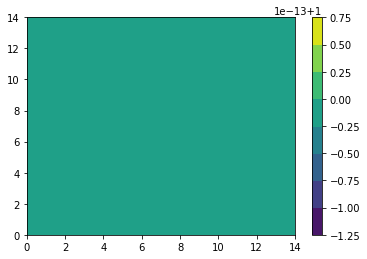

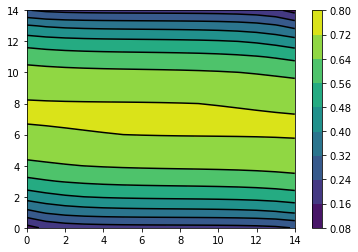

In [97]:
f = lambda x, y, t: 0*x #(x, y, t)

C_gauss = 10
u_gauss = lambda x, y: np.exp(-C_gauss*(x**2+y**2))

n_time_steps = 2
u = heat_equaton_Neumann_2d(f, u_cte, nx=15, nt=n_time_steps, a=-2, b=2, T=2)
for i in range(n_time_steps):
    cs = plt.contourf(u[i])
    plt.contour(u[i], colors='k', lw=3)
    cbar = plt.colorbar(cs)
    plt.show()

# Exact solution:

We define
$$
u_{ex} = e^{-C_g (x^2+y^2) + 1/(t+1)}, \quad C_g=10 \quad \text{ en }\Omega=(-1,1)^2.
$$
Así,  
$$
|\nabla u_{ex}(x,y)|_{\partial\Omega} = (2e^{-10}, 2e^{-10})^T \simeq (0,0)^T. 
$$

For each $t$, we take $f=u_t - \Delta u = -1/(t+1)^2 - 40(10x^2 + 10y^2 -1) exp(-10(x^2+y^2))$

In [34]:
import sympy as sy
#sy.init_printing()
x, y, t = sy.symbols("x y t")
C_g = 10
uex_s = sy.exp( - C_g * (x**2+y**2) ) + 1/(1+t)
uex_s

exp(-10*x**2 - 10*y**2) + 1/(t + 1)

In [5]:
Dxx_uex = sy.diff(uex_s,x,2)
Dyy_uex = sy.diff(uex_s,y,2)
Laplace=Dxx_uex + Dyy_uex
sy.factor(-Laplace)

-40*(10*x**2 + 10*y**2 - 1)*exp(-10*x**2)*exp(-10*y**2)

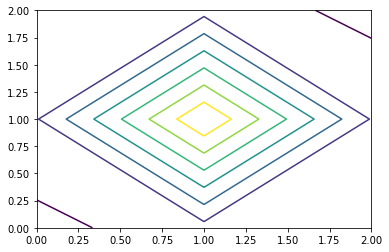

In [35]:
f_ex = sy.diff(uex_s,t,1) - Laplace
f = sy.lambdify((x,y,t), f_ex)

C_gauss = 10
u_gauss = lambda x, y: np.exp(-C_gauss*(x**2+y**2)) + 1

u = heat_equaton_Neumann_2d(f, u_gauss, nx=3, nt=10, a=-1, b=1, verbosity=0)
plt.contour(u[10])

In [36]:
n = 3
u = heat_equaton_Neumann_2d(f, u_gauss, nx=n, nt=10, a=-1, b=1, verbosity=0)
#---------

titer=1

#---------

tt = linspace(0, 1, 10+1)
print("APPROX. SOLUTION at titer=%i (t=%.2f)" %(titer, tt[titer]))
print(u[titer])

#---------

u_ex = sy.lambdify((x,y,t), uex_s)
a, b = -1, 1
h = (b-a)/(n+1)
xx = linspace(a+h, b-h, num=n)

X, Y = np.meshgrid(xx,xx)

sol_exact = u_ex(X,Y,tt[titer])
print("EXACT SOLUTION:")
print(sol_exact)

APPROX. SOLUTION at titer=1 (t=0.10)
[[ 0.58741329  0.83236515  0.73281418]
 [ 0.94510579  2.82282005  0.94510579]
 [ 0.73281418  0.83236515  0.58741329]]
EXACT SOLUTION:
[[ 0.91582886  0.99117591  0.91582886]
 [ 0.99117591  1.90909091  0.99117591]
 [ 0.91582886  0.99117591  0.91582886]]


array([[ 0.00673795,  0.082085  ,  0.00673795],
       [ 0.082085  ,  1.        ,  0.082085  ],
       [ 0.00673795,  0.082085  ,  0.00673795]])